**Cox, Ingersoll and Ross (Mean Reverting processess)**


In [3]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

** Square Root Diffusion **


In [4]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1

In [5]:
I = 10000
T = 2
M = 50
dt = T/M


In [10]:
def srd_euler():
    xh = np.zeros((M+1, I))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    
    for t in range(1, M+1):
        xh[t] = (xh[t-1] + kappa * (theta -np.maximum(xh[t-1], 0)) * dt
                + sigma * np.sqrt(np.maximum(xh[t-1], 0)) * np.sqrt(dt) * npr.standard_normal(I))
        
    x1 = np.maximum(xh, 0)
    return x1

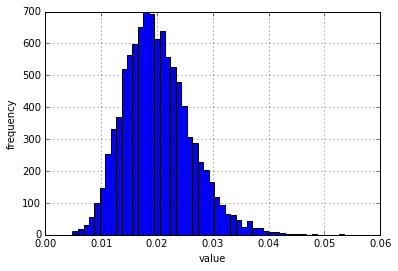

In [12]:
x1 = srd_euler()
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

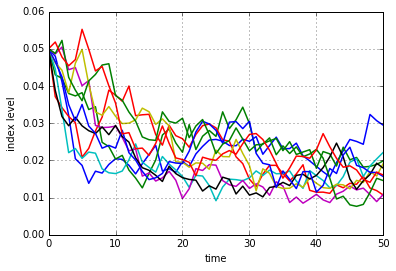

In [13]:
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

** Stochastic Volatility **

volatility process uses Euler Scheme for square-root diffusion process type and for index level Euler Scheme for geometric brownian motion

In [14]:
S0 = 100.
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0

corr_mat = np.zeros((2,2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)

In [16]:
M = 50
I = 10000

In [17]:
ran_num = npr.standard_normal((2, M+1, I))

In [21]:
dt = T/ M
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0

In [24]:
for t in range(1, M+1):
    ran = np.dot(cho_mat, ran_num[:,t,:])
    vh[t] = (vh[t-1] + kappa * (theta - np.maximum(vh[t-1], 0)) * dt
            + sigma * np.sqrt(np.maximum(vh[t-1], 0)) * np.sqrt(dt) * ran[1])
v = np.maximum(vh, 0)

In [26]:
s = np.zeros_like(ran_num[0])
s[0] = S0
for t in range(1, M+1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    s[t] = s[t-1] * np.exp((r-0.5*v[t]) * dt +
                          np.sqrt(v[t]) *ran[0]*np.sqrt(dt))

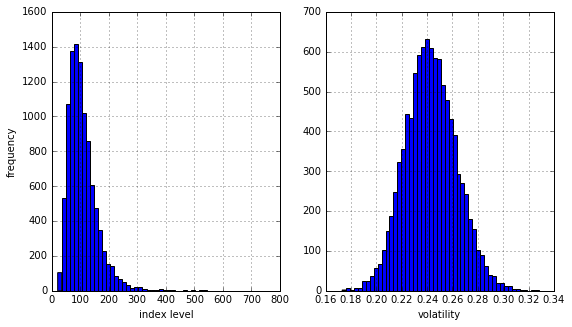

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(9,5))
ax1.hist(s[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.grid(True)

ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility')
ax2.grid(True)

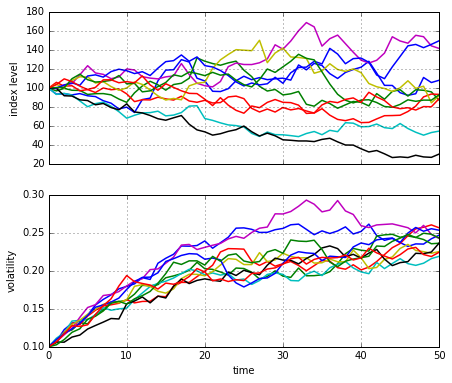

In [32]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(7,6))
ax1.plot(s[:,:10], lw=1.5)
ax1.set_ylabel('index level')
ax1.grid(True)

ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')
ax2.grid(True)